In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from mom import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [4]:
df_dict = {}
candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
for coin in candidate:
    try:
        df_dict[coin] = get_data(coin)
    except:
        pass

In [23]:
df_dict['SOL'] = get_data('SOL')

Start                               2022-01-01 00:00:00
End                                 2023-11-07 00:00:00
Period                                675 days 01:00:00
Start Value                                     10000.0
Min Value                                   8942.863701
Max Value                                  36356.065221
End Value                                  34836.216328
Total Return [%]                             248.362163
Benchmark Return [%]                         -75.533643
Total Time Exposure [%]                       42.880069
Max Gross Exposure [%]                       107.749661
Max Drawdown [%]                              17.324462
Max Drawdown Duration                  82 days 02:00:00
Total Orders                                        153
Total Fees Paid                              458.869447
Total Trades                                         77
Win Rate [%]                                  59.210526
Best Trade [%]                                36

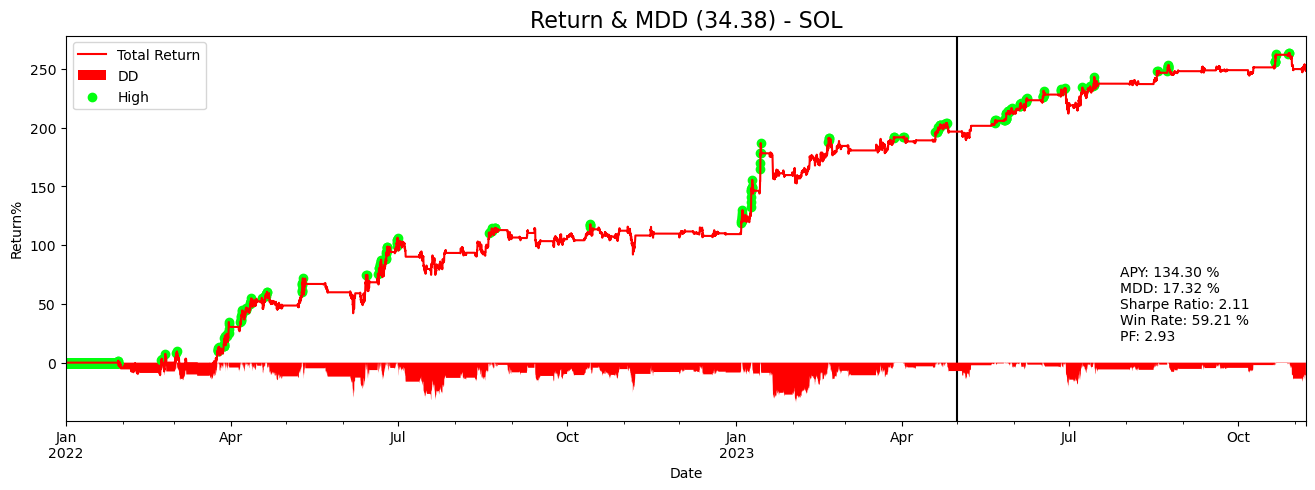

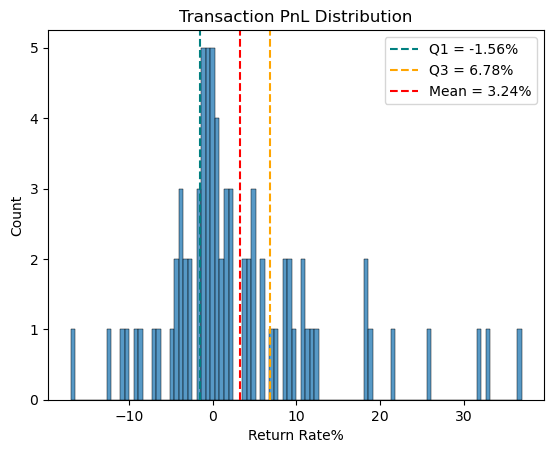

In [38]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
# v2
params = {'window_l_k': 40, 'window_l_d': 48, 'window_s_k': 100, 'window_s_d': 126, 'upper_bound': 95}

# sol : 40,48,100,126,95
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])
analyze.plot_ret_dist(trades)

======================= 1INCH BOTH Optimize Test =======================
Optimization trails: 4096


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4096 out of 4096 | elapsed:  2.2min finished


Optimization time: 132.57 sec
---------- 1INCH BOTH ----------
{'window_l_k': 48, 'window_l_d': 72, 'window_s_k': 94, 'window_s_d': 70, 'upper_bound': 95}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  30995.208704
End Value                                  30263.770521
Total Return [%]                             202.637705
Benchmark Return [%]                         -81.254912
Total Time Exposure [%]                       42.146776
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              12.424588
Max Drawdown Duration                  75 days 13:00:00
Total Orders                                        121
Total Fees Paid                              366.078802
Total

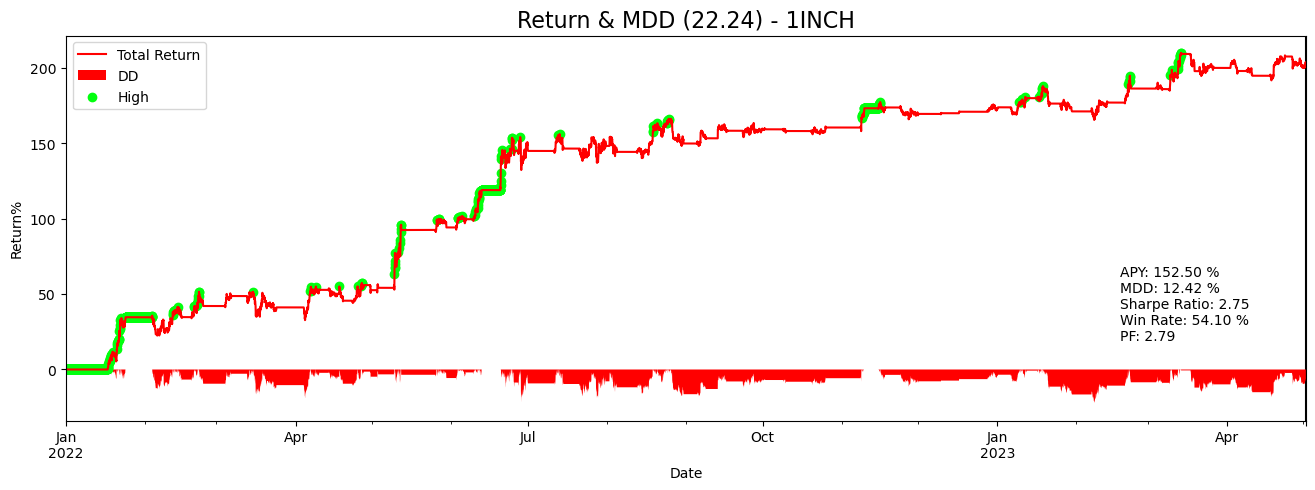

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     41.22 |  6950.86 | -2830.35 |       2.46 |   60    |         10 |
| 2022-06    |    103.8  | 11842.7  | -1462.98 |       8.09 |   61.54 |         13 |
| 2022-09    |     14.34 |  3971.68 | -2537.44 |       1.57 |   50    |         12 |
| 2022-12    |     14.59 |  2081.53 |  -622.21 |       3.35 |   60    |         10 |
| 2023-03    |     26.14 |  5099.13 | -2484.78 |       2.05 |   50    |         12 |
| 2023-06    |      2.56 |  1499.74 | -1244.08 |       1.21 |   40    |          5 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= 1000SHIB BOTH Optimize Test =======================
Optimization trails: 4096


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4096 out of 4096 | elapsed:  2.2min finished


Optimization time: 132.4 sec
---------- 1000SHIB BOTH ----------
{'window_l_k': 48, 'window_l_d': 88, 'window_s_k': 110, 'window_s_d': 126, 'upper_bound': 95}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  30022.097359
End Value                                  29803.069143
Total Return [%]                             198.030691
Benchmark Return [%]                         -70.579367
Total Time Exposure [%]                       25.840192
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                               10.38727
Max Drawdown Duration                  84 days 16:00:00
Total Orders                                         74
Total Fees Paid                              223.517025
T

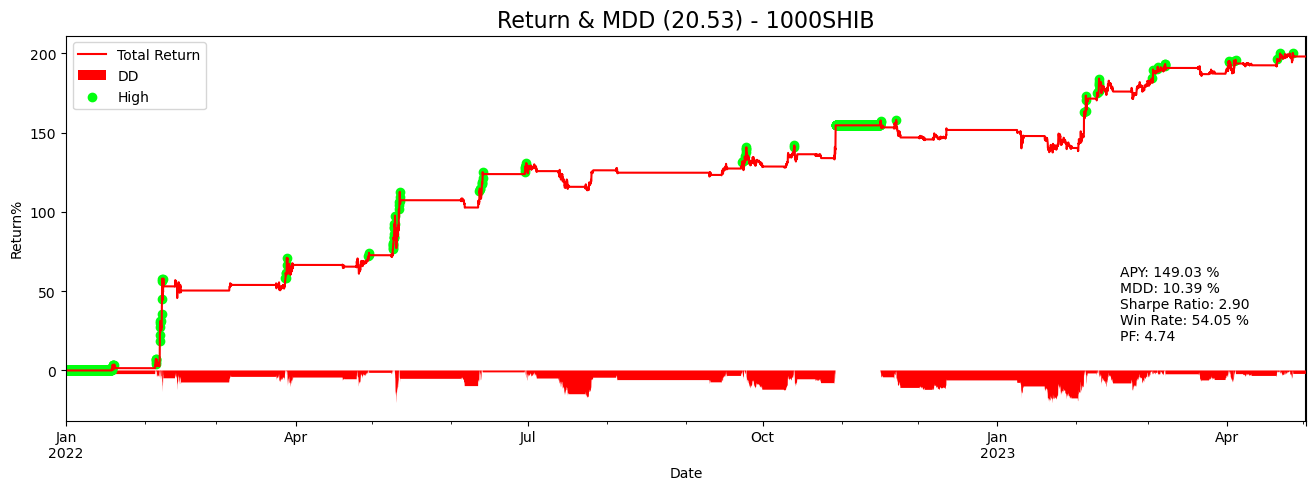

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     66.56 | 6920.33 |  -264.02 |      26.21 |   80    |          5 |
| 2022-06    |     59.18 | 6483.02 |  -564.99 |      11.47 |   66.67 |          6 |
| 2022-09    |      2.9  | 1904.93 | -1615.12 |       1.18 |   42.86 |          7 |
| 2022-12    |     23.05 | 3436.16 | -1130.86 |       3.04 |   42.86 |          7 |
| 2023-03    |     41.93 | 5799.96 | -1607.32 |       3.61 |   50    |         10 |
| 2023-06    |      4.41 |  554.81 |  -113.85 |       4.87 |   50    |          2 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= AAVE BOTH Optimize Test =======================
Optimization trails: 4096


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4096 out of 4096 | elapsed:  2.1min finished


Optimization time: 125.63 sec
---------- AAVE BOTH ----------
{'window_l_k': 56, 'window_l_d': 56, 'window_s_k': 110, 'window_s_d': 78, 'upper_bound': 95}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  26886.651273
End Value                                  26772.409136
Total Return [%]                             167.724091
Benchmark Return [%]                         -73.827321
Total Time Exposure [%]                       39.000343
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              19.143295
Max Drawdown Duration                 302 days 04:00:00
Total Orders                                        101
Total Fees Paid                              304.854459
Total

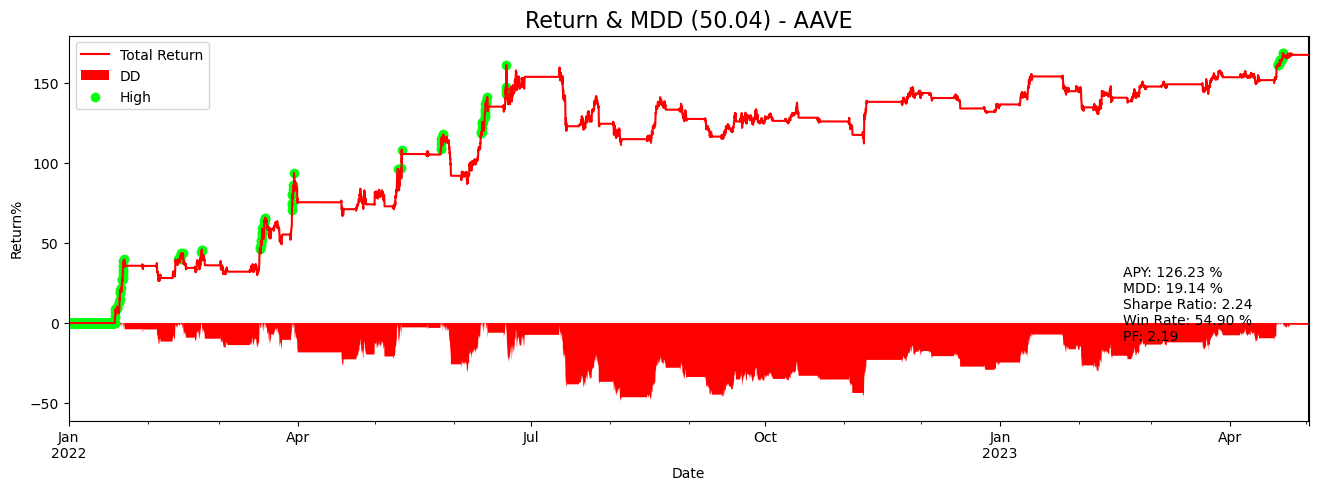

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     75.54 | 9331.2  | -1777.95 |       5.25 |   54.55 |         11 |
| 2022-06    |     78.46 | 9765.16 | -1919.39 |       5.09 |   55.56 |          9 |
| 2022-09    |    -27.56 | 3001.41 | -5757.18 |       0.52 |   50    |         10 |
| 2022-12    |     10.28 | 3277.99 | -2249.52 |       1.46 |   50    |         10 |
| 2023-03    |     17.02 | 3846.87 | -2144.95 |       1.79 |   62.5  |          8 |
| 2023-06    |     13.99 | 1633.44 |  -234.68 |       6.96 |   66.67 |          3 |
+------------+-----------+---------+----------+------------+---------+------------+


{'1INCH': {'both': {0: {'window_l_k': 48,
    'window_l_d': 72,
    'window_s_k': 94,
    'window_s_d': 70,
    'upper_bound': 95}}},
 '1000SHIB': {'both': {0: {'window_l_k': 48,
    'window_l_d': 88,
    'window_s_k': 110,
    'window_s_d': 126,
    'upper_bound': 95}}},
 'AAVE': {'both': {0: {'window_l_k': 56,
    'window_l_d': 56,
    'window_s_k': 110,
    'window_s_d': 78,
    'upper_bound': 95}}}}

In [22]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

params={
    'window_l_k': [40, 100, 8],
    'window_l_d': [40, 100, 8],
    'window_s_k': [70, 130, 8],
    'window_s_d': [70, 130, 8],
    'upper_bound': [95, 96, 1]
    }

config = {'freq':'1h','fee': 0.0003}
symbol_list = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
all_params